###  Diseñaremos características a partir de un ‘dataset’ con información sobre la participación y la demografía de los votantes. Se selecciona dos variables numéricas con las que trabajar:
1.	age: la edad de un votante registrado al final del año electoral
2.	birth_year: el año en que nació un votante registrado


In [7]:
import pandas as pd
import numpy as np

# Cargando archivo de datos
df = pd.read_csv('UC_gen_2020',
                     usecols=['birth_age_adj',
                              'birth_year'])
df.rename(columns={'birth_age_adj':'age'}, inplace=True)
df['age'] = df['age'].astype(int)
df.head()


,age,birth_year
0,65,1955
1,57,1963
2,47,1973
3,72,1948
4,53,1967


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168070 entries, 0 to 168069
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   age         168070 non-null  int32
 1   birth_year  168070 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 1.9 MB


### 1.	Uso de np.where() para indicar umbrales

In [24]:
print('Votantes menores de 22 años')
df['primera_pres_elec'] = np.where(df['age']<22, 1, print(0))
print(df)
cant22 = df['primera_pres_elec'].sum()
print(f"Cantidad de votantes menores de 22 años = {cant22}")
print()
print('Votantes mayores o iguales a 65 años')
df['mayor'] = np.where(df['age']>=65, 1, 0)
print(df)
cant65 = df['mayor'].sum()
print(f"Cantidad de votantes mayores o iguales a 65 años = {cant65}")

Votantes menores de 22 años
0
        age  birth_year primera_pres_elec  mayor
0        65        1955              None      1
1        57        1963              None      0
2        47        1973              None      0
3        72        1948              None      1
4        53        1967              None      0
...     ...         ...               ...    ...
168065   21        1999                 1      0
168066   18        2002                 1      0
168067   41        1979              None      0
168068   33        1987              None      0
168069   52        1968              None      0

[168070 rows x 4 columns]
Cantidad de votantes menores de 22 años = 13748

Votantes mayores o iguales a 65 años
        age  birth_year primera_pres_elec  mayor
0        65        1955              None      1
1        57        1963              None      0
2        47        1973              None      0
3        72        1948              None      1
4        53        1967 

### FUNCIONES NECESARIAS

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
def check_unique(col, df, dropna=False):

    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    return unique_vals

In [30]:
def plot_hist(variable, data, rotation=0, ha='center', figsize=(10,7)):
    
    plt.figure(figsize=figsize)
    ax = sns.histplot(x=data[variable],
                       palette='nipy_spectral')
    
    if variable == 'age':
        xtick_lab = [0,20,40,60,80,100]
    if variable == 'birth_year':
        xtick_lab = [1900,1920,1940,1960,1980,2000]
    ax.set_xticklabels(xtick_lab,
                           fontsize=12, weight='bold')
    ax.set_title(f'{variable.title()} Distribution', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable.title()}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

In [32]:
def plot_count(variable, data, rotation=0, ha='center', figsize=(8,6)):
    
    if variable == 'generation':
        order = ['GenZ', 'Millennial', 'GenX', 'Boomer', 'Greatest-Silent']
    else:
        order = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]
    
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=data[variable],
                       order=order,
                       palette='nipy_spectral')
    
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=rotation,
                       horizontalalignment=ha,
                       fontsize=12, weight='bold')
    ax.set_title(f'{variable.title()} Counts', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable.title()}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

In [33]:
def plot_hist_highlight(variable, data, low, high, rotation=0, ha='center', figsize=(10,7)):
    
    plt.figure(figsize=figsize)
    ax = sns.histplot(x=data[variable], kde=True,
                       palette='nipy_spectral')
    
    if variable == 'age':
        xtick_lab = [0,20,40,60,80,100]
    if variable == 'birth_year':
        xtick_lab = [1900,1920,1940,1960,1980,2000]
    ax.set_xticklabels(xtick_lab,
                       fontsize=12, weight='bold')

    kde_x, kde_y = ax.lines[0].get_data()
    print(ax.lines)
    
    #plotting the two lines
    p1 = plt.axvline(x=low, color='black', ls='--', lw=4)
    p2 = plt.axvline(x=high, color='black', ls='--', lw=4)


    ax.fill_between(kde_x, kde_y, where=(kde_x<low) | (kde_x>high) , 
                interpolate=True, color=['red', 'yellow'])
    
    ax.set_title(f'{variable.title()} Distribution', 
                 fontsize=16,
                 weight='bold')
    ax.set_xlabel(f'{variable.title()}',
                  fontsize=14,
                  weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

C:\Users\REY\AppData\Local\Temp\ipykernel_26724\503557272.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_26724\503557272.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_lab,


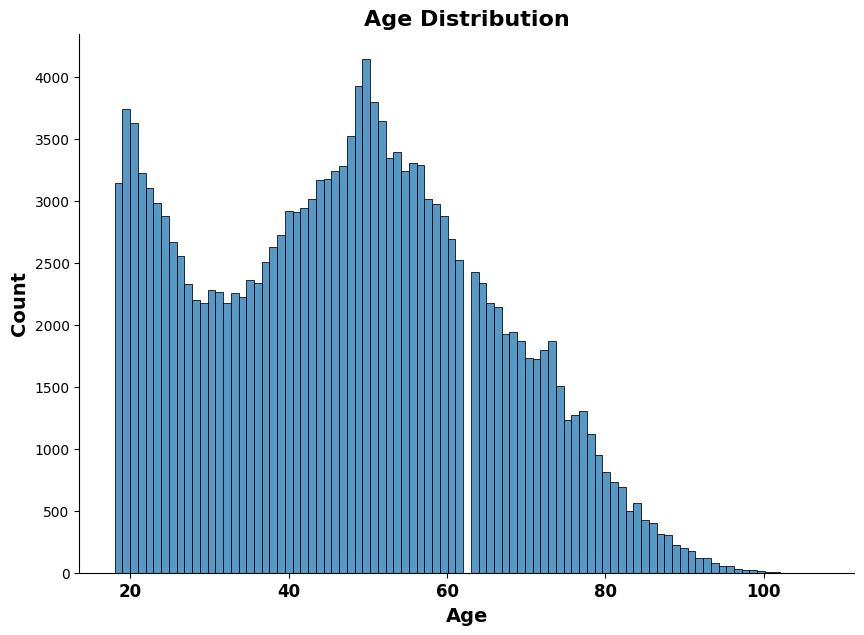

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot_hist('age', df);


In [36]:
df['first_pres_elec'] = np.where(df['age']<22, 1, 0)
check_unique('first_pres_elec', df)

,count,%
first_pres_elec,,
0,154322,91.82
1,13748,8.18


Hemos creado dos indicadores de umbral que dividen la distribución de la edad de los votantes, como se muestra a continuación. Los individuos más jóvenes que recientemente han cumplido los requisitos para votar en una elección presidencial están resaltados en rojo y los mayores están resaltados en amarillo.

C:\Users\REY\AppData\Local\Temp\ipykernel_26724\421015230.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(x=data[variable], kde=True,
C:\Users\REY\AppData\Local\Temp\ipykernel_26724\421015230.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_lab,


<Axes.ArtistList of 1 lines>


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/blog_bin_num_features/age_thresh.png'

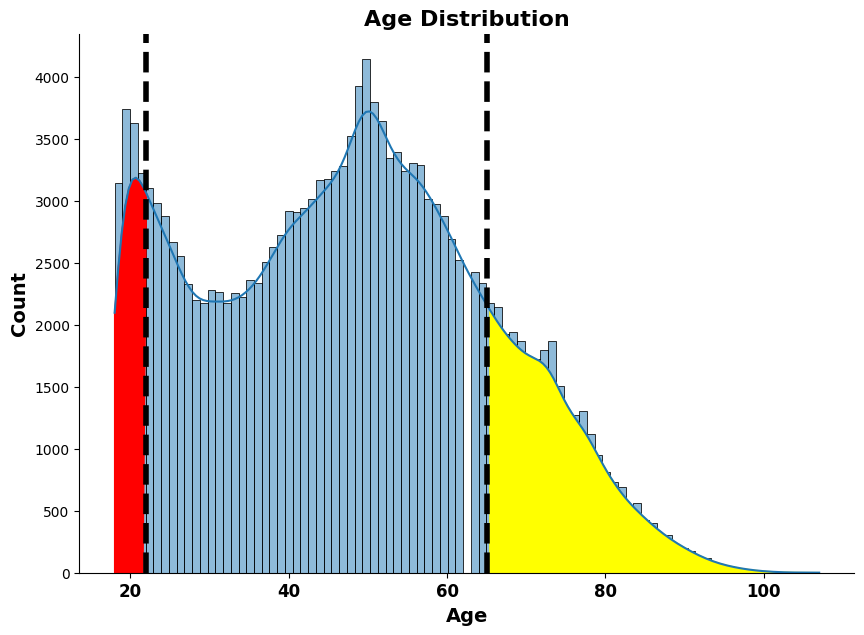

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plot_hist_highlight('age', df, 22, 65)
plt.savefig('Figures/blog_bin_num_features/age_thresh', bbox_inches = "tight");


### 2.	Como aplicar la función personalizada con apply()

Podría tener sentido dividir a nuestros votantes registrados en generaciones en función de su año de nacimiento, ya que a menudo parece que eso está muy relacionado con la política de una persona. Una forma de hacerlo es escribir nuestra propia función personalizada que delinee los puntos de corte para cada generación.
A continuación, se muestra una forma en que podríamos escribir dicha función personalizada:

In [37]:
## Se define una function para agrupar por generación categorías por año de nacimiento
def get_gen_grp(birth_year):
    if birth_year < 1946:
        return 'Greatest-Silent'
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'
    
    else:
        return 'Missing'


Esta función toma un año de nacimiento (birth_year) como argumento y devuelve una cadena que representa la generación a la que pertenece esa persona. Las generaciones están definidas de la siguiente manera:
- Greatest-Silent: Personas nacidas antes de 1946.
- Boomer: Personas nacidas entre 1946 y 1964 (ambos inclusive).
- GenX: Personas nacidas entre 1965 y 1980 (ambos inclusive).
- Millennial: Personas nacidas entre 1981 y 1996 (ambos inclusive).
- GenZ: Personas nacidas a partir de 1997.
El else al final cubre cualquier caso no previsto, pero en este caso, todos los años están cubiertos por las condiciones anteriores.

In [42]:
## Create a new column grouping birth_year into generations
df['generation'] = df['birth_year'].apply(get_gen_grp)

## Check distribution
check_unique('generation', df)

,count,%
generation,,
GenX,53717,31.96
Boomer,44171,26.28
Millennial,38600,22.97
GenZ,19834,11.80
Greatest-Silent,11748,6.99


#### Aplicación de la función a una columna del DataFrame

In [39]:
df['generation'] = df['birth_year'].apply(get_gen_grp)

Ahora nuestros votantes registrados están divididos en cinco categorías discretas y significativas. Decidí combinar las dos generaciones más antiguas (la generación más grande y la generación silenciosa) para no crear dos categorías raras que conforman cada una solo una porción muy pequeña de la población.

C:\Users\REY\AppData\Local\Temp\ipykernel_26724\2557936558.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_26724\2557936558.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


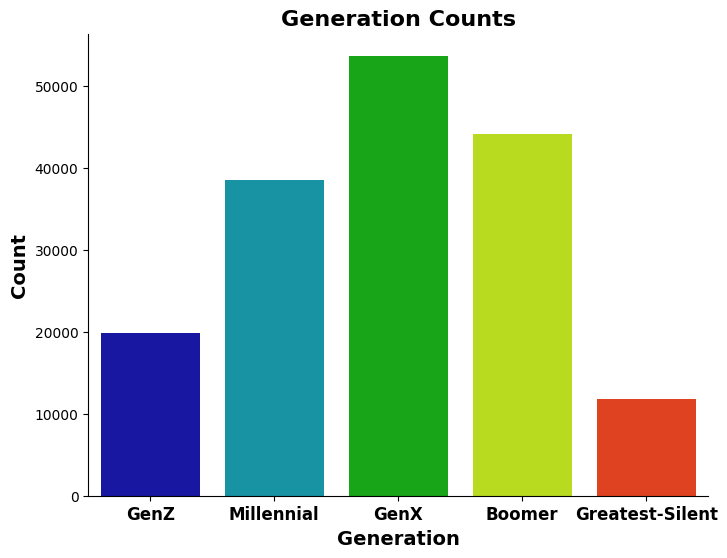

In [44]:
# plot_count('generation', df)
# plt.savefig('Figures/blog_bin_num_features/gen_grps', bbox_inches = "tight");

import os
import matplotlib.pyplot as plt
import seaborn as sns

# Verifica y crea el directorio si no existe
output_dir = 'Figures/blog_bin_num_features/'
os.makedirs(output_dir, exist_ok=True)

# Supongo que `plot_count` es una función personalizada. Ejecútala:
plot_count('generation', df)

# Guardar la figura
output_path = os.path.join(output_dir, 'gen_grps.png')
plt.savefig(output_path, bbox_inches="tight")


### 3.	Definición de contenedores con pd.cut()

También podemos crear los mismos contenedores de generación pd.cut() en lugar de escribir nuestra propia función y aplicarla. Aún tendremos que definir las etiquetas adecuadas para cada grupo, así como los bordes de los contenedores (años de nacimiento recortados).

In [68]:
## Bin registered voters into generation groups using pd.cut
# Define group labels
cut_labels = ['Greatest-Silent', 'Boomer', 'GenX', 'Millennial', 'GenZ']

# Define bin edges
cut_bins = [0, 1945, 1964, 1980, 1996, 2100]

# Create a new column grouping birth_year into generations
df['cut_generation'] = pd.cut(df['birth_year'], bins=cut_bins, labels=cut_labels)

En la última línea, creamos nuestra nueva función proporcionando pd.cut() la columna que queremos agrupar en categorías, los contenedores que queremos y cómo etiquetar cada categoría agrupada.

In [47]:
## Check distribution
check_unique('cut_generation', df)

,count,%
cut_generation,,
GenX,53717,31.96
Boomer,44171,26.28
Millennial,38600,22.97
GenZ,19834,11.80
Greatest-Silent,11748,6.99


En lugar de agrupar por generación, podríamos crear rápidamente un rango y proporcionarlos como bordes de los contenedores. Por ejemplo, si pensamos que sería significativo agrupar por edad por década, podríamos lograrlo de la siguiente manera:

In [71]:
## Bin registered  voters into generation groups using pd.cut

# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column  grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins = cut_bins)

## Check distribution
check_unique('cut_age', df)

,count,%
cut_age,,
"(40, 50]",33349,19.84
"(50, 60]",32924,19.59
"(20, 30]",26411,15.71
"(30, 40]",24427,14.53
"(60, 70]",21781,12.96
"(70, 80]",13614,8.10
"(10, 20]",10520,6.26
"(80, 90]",4349,2.59
"(90, 100]",681,0.41


In [67]:
np.arange(10, 111, 10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])

La primera línea define un rango que comienza en '10' y termina en '110' (sin incluirlo), aumentando de a '10' en cada paso. La segunda línea utiliza ese rango como límite de intervalo para discretizar a los votantes registrados por edad.

La primera fila muestra que 33.349 o el 19,84% de nuestros votantes tienen entre 40 y 49 años. El paréntesis indica que el 40 es inclusivo, mientras que el corchete indica que el 50 está excluido del grupo. Para hacer un seguimiento más fácil de lo que significa cada grupo, podríamos introducir las siguientes etiquetas pd.cut():

In [72]:
## Bin registered  voters into generation groups using  pd.cut
# Define group labels
cut_labels = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]

# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)

## Check distribution
check_unique('cut_age', df)


,count,%
cut_age,,
40's,33349,19.84
50's,32924,19.59
20's,26411,15.71
30's,24427,14.53
60's,21781,12.96
70's,13614,8.10
Teens,10520,6.26
80's,4349,2.59
90's,681,0.41


C:\Users\REY\AppData\Local\Temp\ipykernel_26724\2557936558.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[variable],
C:\Users\REY\AppData\Local\Temp\ipykernel_26724\2557936558.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


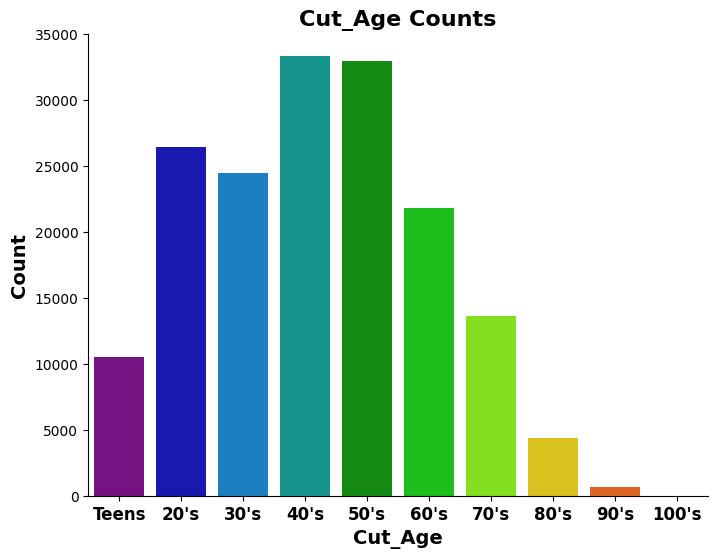

In [73]:
plot_count('cut_age', df)
plt.savefig('Figures/blog_bin_num_features/decade_grps', bbox_inches = "tight");

Para recapitular
Cubrimos:

- Qué significa clasificar las características numéricas
- 1 método para crear un indicador de umbral ( np.where())
- 2 métodos para agrupar características numéricas (función personalizada con Pandas apply()y definición de bordes de agrupamiento con pd.cut())